In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import graphviz

%matplotlib inline

In [320]:
df = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [321]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [323]:
df.shape

(1470, 35)

In [324]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [325]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

- NaN 값이 없다

In [326]:
data = df.iloc[:,:13]

In [327]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40


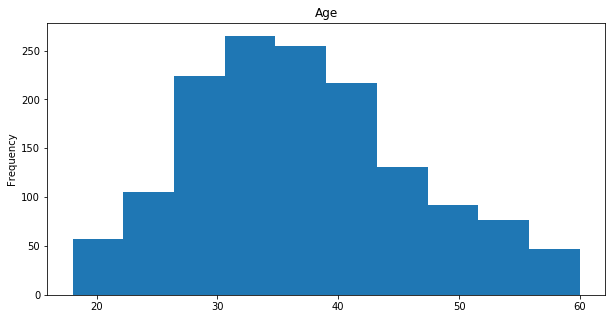

In [328]:
data.Age.plot.hist(title="Age", figsize=(10,5))

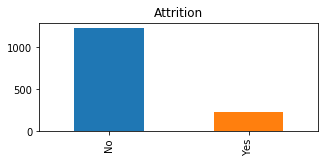

In [329]:
data.Attrition.value_counts().plot.bar(title="Attrition", figsize=(5,2))

- Target 비율 확인

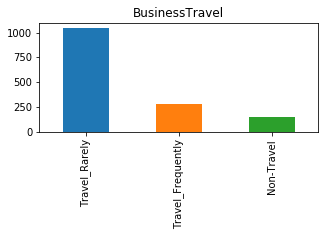

In [330]:
data.BusinessTravel.value_counts().plot.bar(title="BusinessTravel", figsize=(5,2))

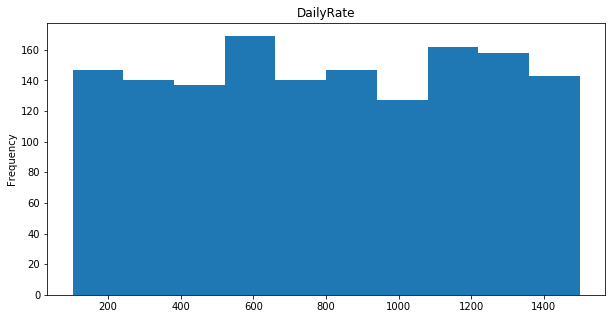

In [331]:
data.DailyRate.plot.hist(title="DailyRate", figsize=(10,5))

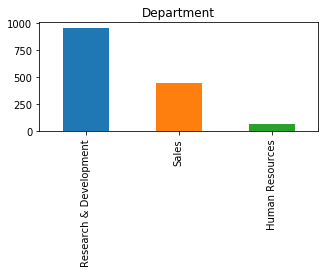

In [332]:
data.Department.value_counts().plot.bar(title="Department", figsize=(5,2))

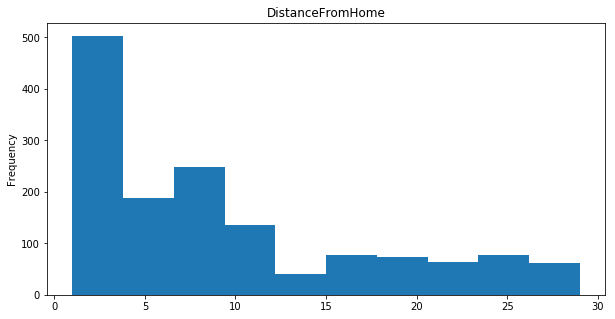

In [333]:
data.DistanceFromHome.plot.hist(title="DistanceFromHome", figsize=(10,5))

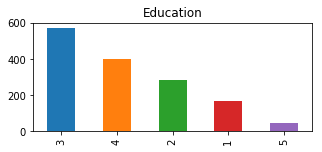

In [334]:
data.Education.value_counts().plot.bar(title="Education", figsize=(5,2))

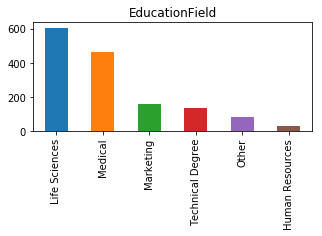

In [335]:
data.EducationField.value_counts().plot.bar(title="EducationField", figsize=(5,2))

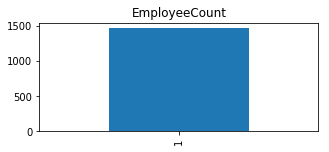

In [336]:
data.EmployeeCount.value_counts().plot.bar(title="EmployeeCount", figsize=(5,2))

- 이거는 전부 1이다. 의미없으니 빼는게 좋겠다

In [337]:
data = data.drop(columns=["EmployeeCount"])

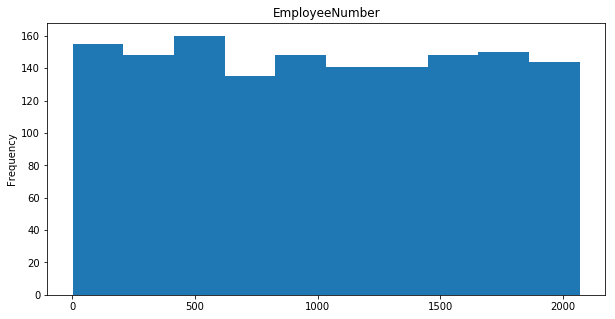

In [338]:
data.EmployeeNumber.plot.hist(title="EmployeeNumber", figsize=(10,5))

In [339]:
data.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
DailyRate                   886
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeNumber             1470
EnvironmentSatisfaction       4
Gender                        2
HourlyRate                   71
dtype: int64

In [340]:
data.shape

(1470, 12)

In [341]:
data = data.drop(columns=["EmployeeNumber"])
data.shape

(1470, 11)

- 1470명의데이턴데 EmployNumber 가 1470개인걸 보니 사번인듯하다. 빼야지.

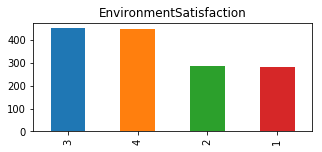

In [342]:
data.EnvironmentSatisfaction.value_counts().plot.bar(title="EnvironmentSatisfaction", figsize=(5,2))

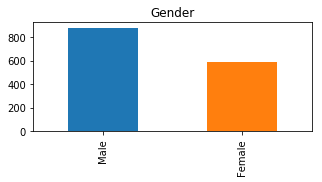

In [343]:
data.Gender.value_counts().plot.bar(title="Gender", figsize=(5,2))

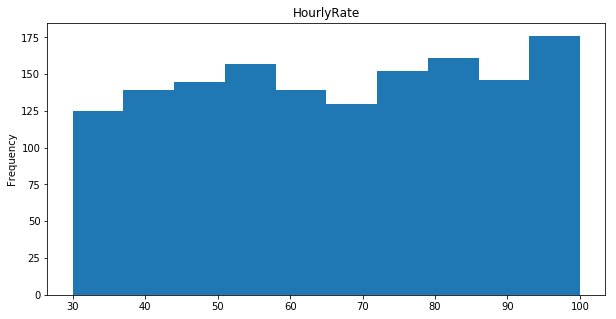

In [344]:
data.HourlyRate.plot.hist(title="HourlyRate", figsize=(10,5))

In [345]:
data.shape

(1470, 11)

In [346]:
data_conversion = pd.get_dummies(data, columns=["Attrition","Department", "BusinessTravel", "Education", "EducationField", "EnvironmentSatisfaction","Gender"])

In [347]:
data_conversion.shape

(1470, 29)

In [348]:
data_conversion.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,Attrition_No,Attrition_Yes,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,...,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male
0,41,1102,1,94,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,49,279,8,61,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,37,1373,2,92,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
3,33,1392,3,56,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,27,591,2,40,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [349]:
data_conversion = data_conversion.drop(columns=["Attrition_No"])
data_conversion.shape

(1470, 28)

- Attrition_no 는 필요없다.

In [350]:
data_y = data_conversion["Attrition_Yes"]
data_x = data_conversion.drop(columns=["Attrition_Yes"])
data_x.shape, data_y.shape

((1470, 27), (1470,))

In [351]:
data_np_x = np.array(data_x)
data_np_y = np.array(data_y)
data_np_x.shape, data_np_y.shape

((1470, 27), (1470,))

In [352]:
train_x, test_x, train_y, test_y = train_test_split(data_np_x, data_np_y, test_size=0.2)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((1176, 27), (294, 27), (1176,), (294,))

In [353]:
model = DecisionTreeClassifier(max_depth=15).fit(train_x, train_y)

In [354]:
model.score(train_x, train_y), model.score(test_x, test_y)

(0.9965986394557823, 0.7891156462585034)

In [355]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Users/user/Documents/graphviz-2.38/release/bin/'

In [356]:
export_graphviz(model, out_file='attrition.dot', class_names=["NO", "YES"], feature_names=data_x.columns)

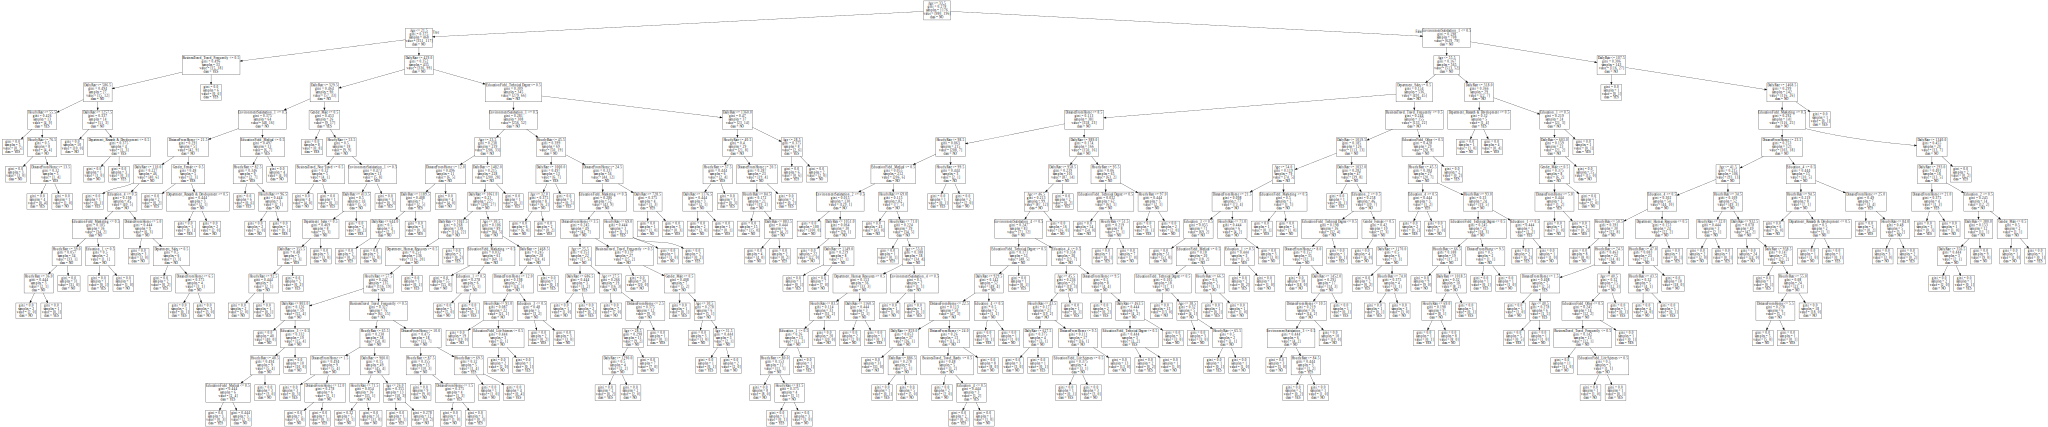

In [357]:
with open('attrition.dot') as f:
    graph = f.read()
display(graphviz.Source(graph))

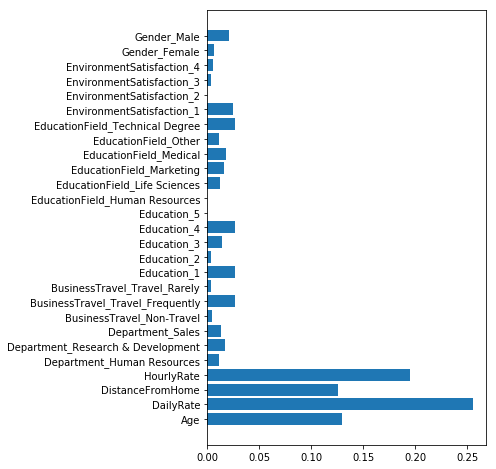

In [358]:
f = plt.figure(figsize=(5,8))
f = plt.barh(range(train_x.shape[1]), model.feature_importances_)
f = plt.yticks(range(train_x.shape[1]), data_x.columns)

# - 가장 큰 영향을 미치는 속성들 : 
### HourlyRate, DistanceFromHome, DailyRate, Age

##### 다른 모델도 다 돌려보자

In [359]:
def test_model(model, train_x, test_x, train_y, test_y):
    model.fit(train_x, train_y)
    print('Performance:{}, {}'.format(model.score(train_x, train_y), model.score(test_x, test_y)))
    pass

In [360]:
test_model(KNeighborsClassifier(), train_x, test_x, train_y, test_y)
test_model(LinearRegression(), train_x, test_x, train_y, test_y)
test_model(LogisticRegression(), train_x, test_x, train_y, test_y)
test_model(RandomForestClassifier(), train_x, test_x, train_y, test_y)
test_model(LinearSVC(), train_x, test_x, train_y, test_y)
test_model(SVC(), train_x, test_x, train_y, test_y)

Performance:0.8401360544217688, 0.8231292517006803
Performance:0.08176657589770753, 0.05980781038448079
Performance:0.8341836734693877, 0.8639455782312925
Performance:0.9761904761904762, 0.8639455782312925
Performance:0.8341836734693877, 0.8605442176870748
Performance:0.9965986394557823, 0.8605442176870748


### 랜덤 포레스트가 성능이 가장 좋다
- Performance:0.9761904761904762, 0.8639455782312925